<a href="https://colab.research.google.com/github/Precious3ita/Top-spotify-listening/blob/main/Linear_Regression_And_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random

# LinearRegression and mse from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# for normalization
from sklearn.preprocessing import MinMaxScaler

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
# Give path to access the data
path = '/content/IRIS (1).csv'

In [226]:
# Read files using pandas modules
iris_data = pd.read_csv(path)

In [227]:
# Understanding the data
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [228]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [229]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [230]:
iris_data.shape

(150, 5)

In [231]:
iris_data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [232]:
iris_data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [233]:
# Save a copy of the data
iris_data_copy = iris_data.copy()

In [234]:
duplicates = iris_data.duplicated()
duplicates.sum()

np.int64(3)

In [235]:
iris = iris_data.drop_duplicates()

In [236]:
iris.shape

(147, 5)

In [237]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [238]:
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [239]:
# Using plotly
fig = px.bar(
    x = iris['species'],
    y = iris['sepal_length'],
    color = iris['species']
)

fig.update_layout(
    title = 'Species vs Sepal Length',
    xaxis_title = 'Species',
    yaxis_title = 'Sepal Length'
)

fig.show()

#The average sepal length for the three Iris species ranges from approximately 4.3 cm to 7.9 cm,
#with Iris setosa having the shortest average sepal length (under 5.5 cm) and Iris virginica generally having the longest (above 6.5 cm).
#Iris versicolor falls in the middle, typically between 5.5 cm and 6.5 cm.

In [240]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [241]:
fig = px.bar(
    x = iris['species'],
    y = iris['petal_length'],
    color = iris['species']
)

fig.update_layout(
    title = 'Species vs petal Length',
    xaxis_title = 'Species',
    yaxis_title = 'petal Length'
)

fig.show()

In [242]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [243]:
fig = px.bar(
    x = iris['petal_length'],
    y = iris['petal_width'],
    color = iris['species']
)

fig.update_layout(
    title = 'petal length vs petal width',
    xaxis_title = 'petal length ',
    yaxis_title = 'petal width'
)

fig.show()

In [244]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: >

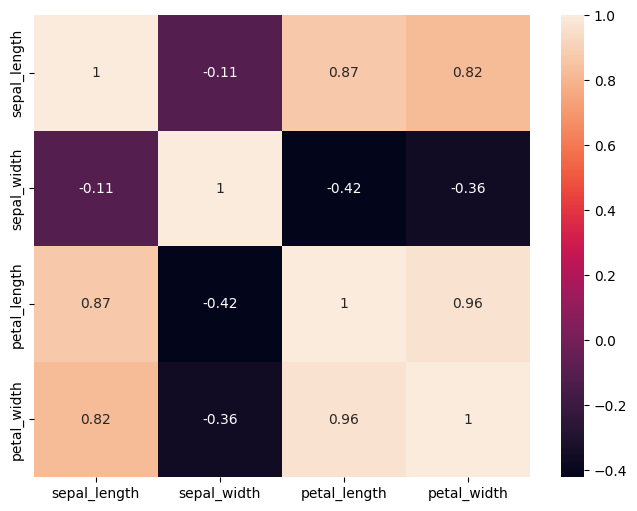

In [245]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(numeric_only=True), annot=True)

#There is a strong, positive correlation between iris petal length and petal width,
# meaning that as one increases, the other tends to increase as well.

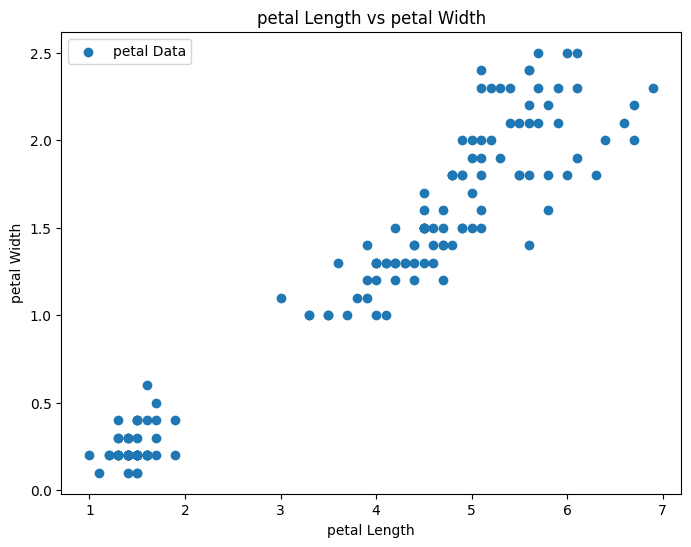

In [246]:
# Patel length vs petal width reresented in scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(iris['petal_length'], iris['petal_width'], label='petal Data')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('petal Length vs petal Width')
plt.legend()
plt.show()

In [247]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [248]:
numerical_columns = iris.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

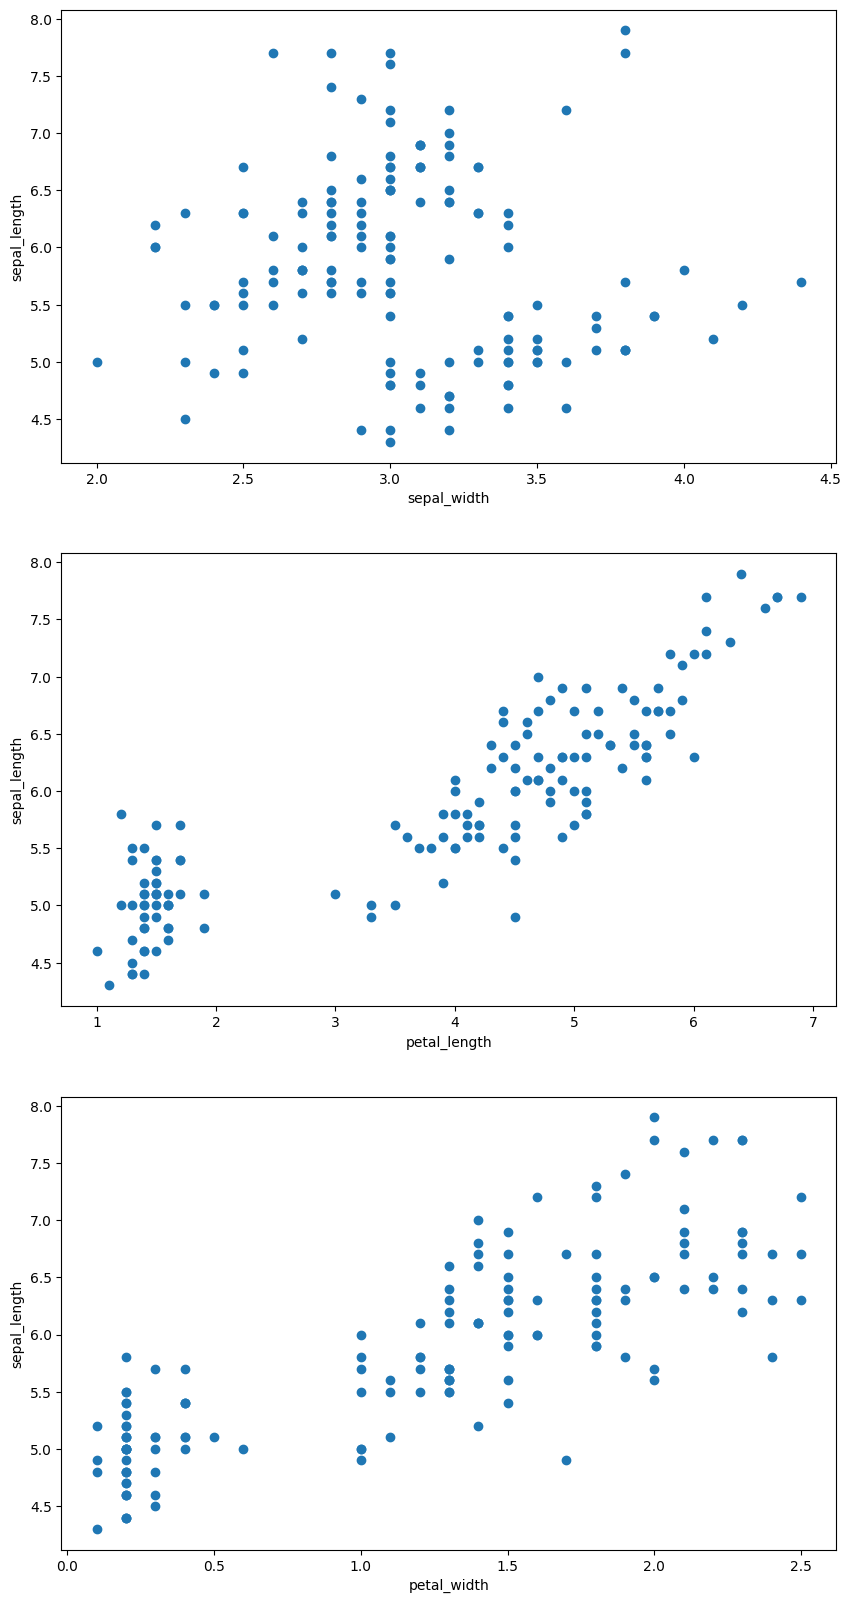

In [249]:
fig, axs = plt.subplots(3, figsize=(10,20))
n_axs = 0
for column in numerical_columns:
    if column == "sepal_length":
        continue
    axs[n_axs].scatter(iris[column], iris["sepal_length"])
    axs[n_axs].set_ylabel("sepal_length")
    axs[n_axs].set_xlabel(column)
    n_axs += 1


Let's build a Linear regression model using just one feature.
I need to create a train-test split of the dataset

In [250]:
from sklearn.model_selection import train_test_split as iris_test_split
iris_train, iris_test = iris_test_split(iris, test_size=0.2, random_state=0)

In [251]:
iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa


In [252]:
iris_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica


Train a Linear regression model using just the sepal_length.

In [253]:
linreg = LinearRegression()
linreg.fit(X=iris_train[["sepal_length"]], y=iris_train["sepal_width"])

LinearRegression()

 I have trained the linear regression model and i will evaluate it by computing the mean squared error on both the train and test set.

In [254]:
train_mse_sepal_length= mean_squared_error(iris_train["sepal_width"], linreg.predict(iris_train[["sepal_length"]]))
test_mse_sepal_length = mean_squared_error(iris_test["sepal_width"], linreg.predict(iris_test[["sepal_length"]]))

In [255]:
train_mse_sepal_length

0.1871738417474941

In [256]:
test_mse_sepal_length

0.18925133483672346

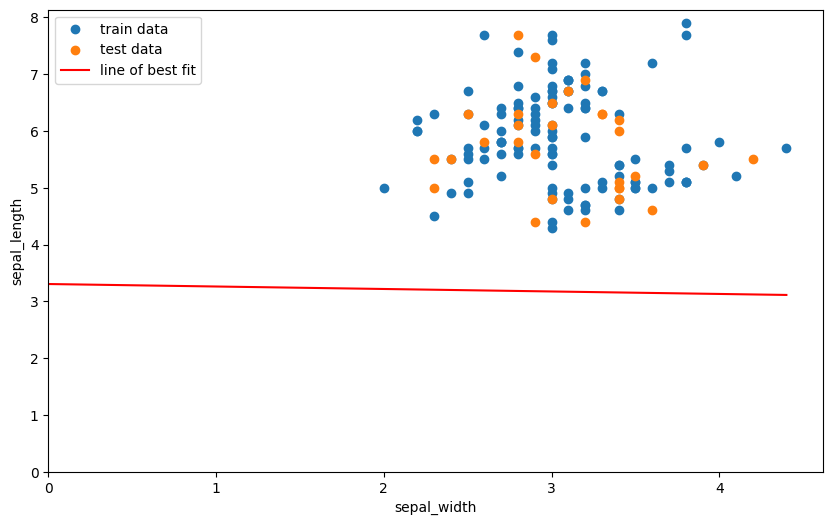

In [257]:
fig = plt.figure(figsize=(10,6))

# scatter plot for both train and test set
plt.scatter(iris_train["sepal_width"], iris_train["sepal_length"], label="train data")
plt.scatter(iris_test["sepal_width"], iris_test["sepal_length"], label="test data")

# predictions using y = ax + b
predictions = [linreg.coef_*i + linreg.intercept_ for i in [0, iris_train["sepal_width"].max()]]

# plot the line based on the prediction
plt.plot([0, iris_train["sepal_width"].max()], predictions, color="r", label="line of best fit")

plt.xlabel("sepal_width"); plt.ylabel("sepal_length")
plt.ylim(0)
plt.xlim(0)
plt.legend();

Using two features
Let's introduce another feature patel length

In [258]:
iris_train[["sepal_length","sepal_width", "petal_length"]].head()

,sepal_length,sepal_width,petal_length
78,6.0,2.9,4.5
18,5.7,3.8,1.7
47,4.6,3.2,1.4
52,6.9,3.1,4.9
46,5.1,3.8,1.6


In [259]:
linreg.fit(X=iris_train[["sepal_width", "petal_length"]], y=iris_train["sepal_length"])

LinearRegression()

In [260]:
# train mse
train_mse_petal_length = (
    mean_squared_error(iris_train["sepal_length"], linreg.predict(iris_train[["sepal_width", "petal_length"]]))
)

test_mse_petal_length = (
    mean_squared_error(iris_test["sepal_length"], linreg.predict(iris_test[["sepal_width", "petal_length"]]))
)
print(
    f"train mse (using sepal width and petal length) = {train_mse_petal_length}\n"
    f"test mse (using sepal width and petal length)  = {test_mse_petal_length}"
)

train mse (using sepal width and petal length) = 0.11424080834688301
test mse (using sepal width and petal length)  = 0.09207034642437506


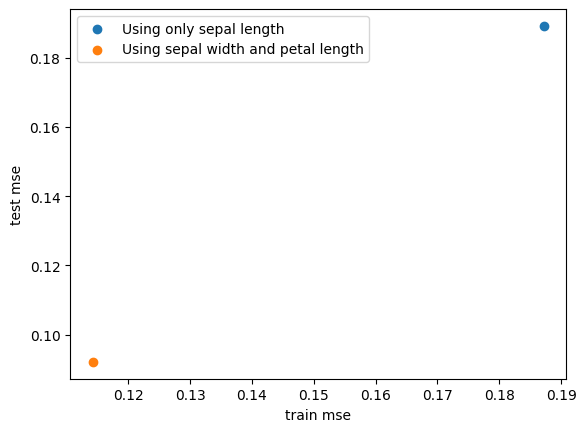

In [261]:
plt.scatter([train_mse_sepal_length], [test_mse_sepal_length], label="Using only sepal length")
plt.scatter([train_mse_petal_length], [test_mse_petal_length], label="Using sepal width and petal length")
plt.ylabel("test mse")
plt.xlabel("train mse")
plt.legend()

In [262]:
numerical_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [263]:
numerical_feature_columns = [c for c in numerical_columns if c != "sepal_length"]
numerical_feature_columns

['sepal_width', 'petal_length', 'petal_width']

In [264]:
X_train = iris_train[numerical_feature_columns]
y_train = iris_train["sepal_length"]
X_test = iris_test[numerical_feature_columns]
y_test = iris_test["sepal_length"]

scaler = MinMaxScaler()

# Select the numerical features for scaling
X_train_scaled = scaler.fit_transform(iris_train[numerical_feature_columns])
X_test_scaled = scaler.transform(iris_test[numerical_feature_columns])

# Training the model with scaled features
linreg.fit(X_train_scaled, y_train)

# train the model
linreg.fit(X_train, y_train)

train_mse_all_numerical = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all_numerical = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all numerical features:\n"
    f"train mse = {train_mse_all_numerical}\n"
    f"test mse  = {test_mse_all_numerical}"
)

Using all numerical features:
train mse = 0.10531960773254027
test mse  = 0.06611042177235589


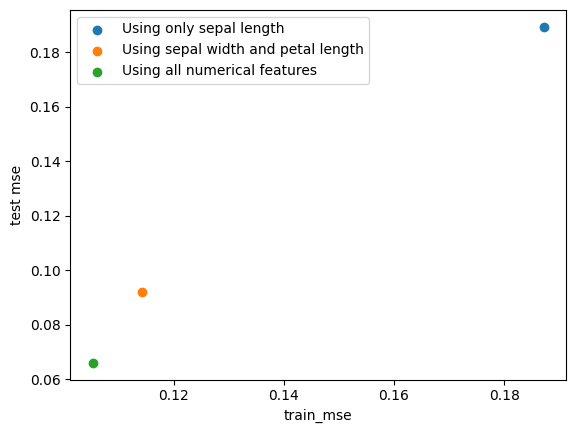

In [265]:
plt.scatter([train_mse_sepal_length], [test_mse_sepal_length], label="Using only sepal length")
plt.scatter([train_mse_petal_length], [test_mse_petal_length], label="Using sepal width and petal length")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

Now let me can include the categorical features and see the impact on performance.

In [266]:
cat_columns = iris.select_dtypes(include=['object']).columns.tolist()
iris_train[cat_columns].head()

,species
78,Iris-versicolor
18,Iris-setosa
47,Iris-setosa
52,Iris-versicolor
46,Iris-setosa


With the categorical features, i have to convert them to numbers so that the model can work with them. One way of doing this is called label encoding.

Let's label encode the categorical features

In [267]:
from sklearn.preprocessing import LabelEncoder
labelEncoders = {c: LabelEncoder() for c in cat_columns}
lbl_species_train = iris_train.copy()
for c in cat_columns:
    labelEncoders[c].fit(iris_train[c])
    lbl_species_train[c] = labelEncoders[c].transform(iris_train[c])

lbl_species_train[cat_columns].head(2)

,species
78,1
18,0


Training all features

In [268]:
X_train = lbl_species_train.drop(columns = ["sepal_length"])
y_train = lbl_species_train["sepal_length"]

# label encode the test data
lbl_species_test = iris_test.copy()
for c in cat_columns:
    lbl_species_test[c] = labelEncoders[c].transform(iris_test[c])

X_test = lbl_species_test.drop(columns=["sepal_length"])
y_test = lbl_species_test["sepal_length"]

# feature scaling/normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training
linreg.fit(X_train, y_train)

train_mse_all = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all the features:\n"
    f"train mse = {train_mse_all}\n"
    f"test mse  = {test_mse_all}"
)

Using all the features:
train mse = 0.1011229736896348
test mse  = 0.07396171954205767


Updating mse plot

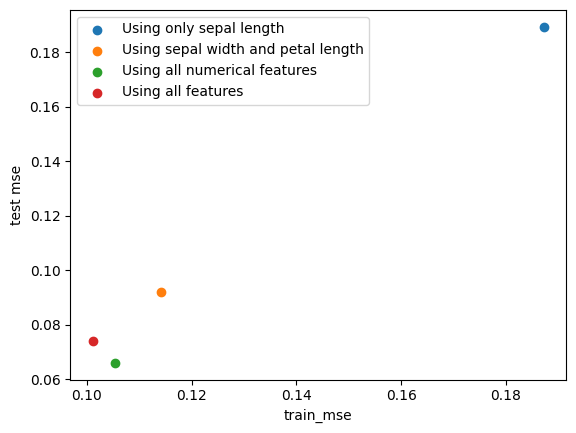

In [269]:
plt.scatter([train_mse_sepal_length], [test_mse_sepal_length], label="Using only sepal length")
plt.scatter([train_mse_petal_length], [test_mse_petal_length], label="Using sepal width and petal length")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.scatter([train_mse_all], [test_mse_all], label="Using all features")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

let encode the categorical columns using one-hot encoding.

In [270]:
pd.get_dummies(iris_train, columns=cat_columns).head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
78,6.0,2.9,4.5,1.5,False,True,False
18,5.7,3.8,1.7,0.3,True,False,False
47,4.6,3.2,1.4,0.2,True,False,False
52,6.9,3.1,4.9,1.5,False,True,False
46,5.1,3.8,1.6,0.2,True,False,False


In [271]:
X_train = pd.get_dummies(iris_train).drop(columns = ["sepal_length"])
y_train = iris_train["sepal_length"]
X_test = pd.get_dummies(iris_test).drop(columns=["sepal_length"])
y_test = iris_test["sepal_length"]

# feature scaling/normalization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training
linreg.fit(X_train, y_train)

train_mse_all_onehot = mean_squared_error(y_train, linreg.predict(X_train))
test_mse_all_onehot = mean_squared_error(y_test, linreg.predict(X_test))

print(
    "Using all the features:\n"
    f"train mse = {train_mse_all_onehot}\n"
    f"test mse  = {test_mse_all_onehot}"
)

Using all the features:
train mse = 0.0966538254796378
test mse  = 0.07377558435957803


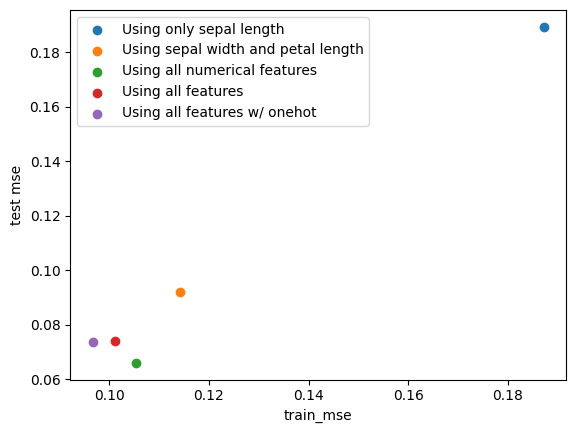

In [272]:
plt.scatter([train_mse_sepal_length], [test_mse_sepal_length], label="Using only sepal length")
plt.scatter([train_mse_petal_length], [test_mse_petal_length], label="Using sepal width and petal length")
plt.scatter([train_mse_all_numerical], [test_mse_all_numerical], label="Using all numerical features")
plt.scatter([train_mse_all], [test_mse_all], label="Using all features")
plt.scatter([train_mse_all_onehot], [test_mse_all_onehot], label="Using all features w/ onehot")
plt.ylabel("test mse")
plt.xlabel("train_mse")
plt.legend()

Linear Classification

In [273]:
import pandas as pd
data = pd.read_csv("/content/IRIS (1).csv")

In [274]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [275]:
# Load the iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Create a DataFrame from the loaded dataset
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [276]:
iris["target_names"].tolist()

['setosa', 'versicolor', 'virginica']

In [277]:
#Create train-test split
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
X_train = train_df.drop(columns=["target"]).values
y_train = train_df["target"]
X_test = test_df.drop(columns=["target"]).values
y_test = test_df["target"]

# remember to scale/normalize
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [278]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, logReg.predict(X_train))
test_accuracy = accuracy_score(y_test, logReg.predict(X_test))

print(
    f"Train accuracy is {train_accuracy}\n"
    f"Test accuracy is {test_accuracy}"
)

Train accuracy is 0.925
Test accuracy is 0.9


In [279]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(
    f"Train accuracy is {train_accuracy}\n"
    f"Test accuracy is {test_accuracy}"
)

Train accuracy is 0.925
Test accuracy is 0.9
